<a href="https://colab.research.google.com/github/Natalia9922/Employee-_classification_project/blob/main/Employee__classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task content:

# What makes an employee want to stay with their current employer? Try to predict whether the employee will leave or not.

**Explanation of part of the data:**

**Education**
1.   'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'
**EnvironmentSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'
**JobInvolvement**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'
**JobSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'
**PerformanceRating**
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'
**RelationshipSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'
**WorkLifeBalance**
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

**EmployeeCount**
* The number of people represented by the entry.

**Monthly Rate a Monthly income**
* The amount the employer pays for an employee.
**DailyRate**
* Similarly to before.

**Attrition**
* Information about whether an employee quit their job or not.

**STOCK OPTIONS LEVEL***
* What percentage of shares the employee owns/can hold.

**PERCENT SALARY HIKE***
* Percentage increase in salary over the last 2 years.

# Importing Libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate, RandomizedSearchCV

from sklearn.preprocessing import LabelBinarizer

In [138]:
SEED = 123

# Loading Dataset

In [139]:
# defining a data frame
df_1 = pd.read_csv('/content/df_1.csv',index_col=0)
df_2 = pd.read_csv('/content/df_2.csv',index_col=0)
target = pd.read_csv('/content/target.csv',index_col=0)

# Exploratory Data Analysis (EDA)





In [140]:
df_1.head() # return the first 5 rows

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [141]:
df_2.head()  # return the first 5 rows

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0


In [142]:
target.head()  # return the first 5 rows

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No


In [143]:
df = df_1.merge(df_2, on = "EmployeeNumber", how = "inner").merge(target, on = "EmployeeNumber", how = "inner") # join tables based on EmployeeNumber

In [144]:
df.head() # return the first 5 rows

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0,No
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0,No
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0,No
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0,No
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0,No


In [145]:
df.tail() # return the last 5 rows, for verification, to make sure that the data has been correctly loaded and processed

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition
4297,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,95736.0,Yes
4298,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,95736.0,Yes
4299,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,44496.0,Yes
4300,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,44496.0,Yes
4301,7979,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,44496.0,Yes


In [146]:
df.shape # get the number of rows (4302) and the number of columns (36)

(4302, 36)

In [147]:
df.size  #  returns the number of elements in the DataFrame.

154872

In [148]:
df.columns # gives the name of the column

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'YearlyIncome', 'Attrition'],
      dtype='object')

In [149]:
df.info()  # prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4301
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Age                       4302 non-null   float64
 2   BusinessTravel            4302 non-null   object 
 3   DailyRate                 4302 non-null   float64
 4   Department                4302 non-null   object 
 5   DistanceFromHome          4302 non-null   float64
 6   Education                 4302 non-null   float64
 7   EducationField            4302 non-null   object 
 8   EmployeeCount             4302 non-null   float64
 9   EnvironmentSatisfaction   4302 non-null   float64
 10  Gender                    4302 non-null   object 
 11  HourlyRate                4302 non-null   float64
 12  JobInvolvement            4302 non-null   float64
 13  JobLevel                  4302 non-null   float64
 14  JobRole 

DataFrame contains 36 columns, 9 categorical, 27 numerical, lack of missing values

In [150]:
# checking missing values
df.isnull().sum()

EmployeeNumber              0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

As befor - visible lack of missing values

In [151]:
# duplicate checking
df.duplicated().sum()

0

Lack of duplicate values

# Basic Data Cleaning

In [152]:
def annotate_plot(plots): # defining formats barplot
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')

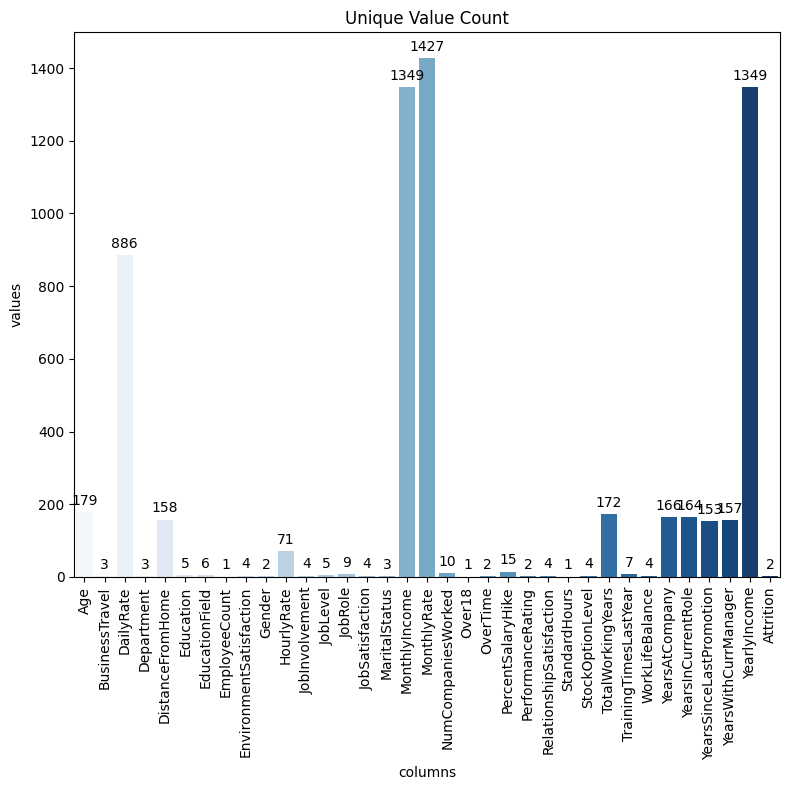

In [153]:
# creating a barplot of unique values and their quantity
plt.figure(figsize=(8,8))
unique_df = pd.DataFrame(df.apply(lambda x: x.nunique()))
unique_df.drop("EmployeeNumber",inplace =True)
unique_df = unique_df.reset_index()
unique_df.columns = ["columns","values"]
g = sns.barplot(x="columns",data = unique_df, y= "values", palette = 'Blues' )
annotate_plot(g)
plt.xticks(rotation=90)
plt.title("Unique Value Count")
plt.tight_layout()
plt.show()

Remove columns with one value - StandardHours, Over18, EmployeeCount

In [154]:
# drop unnecessary column with one value and and not needed for modelling
df.drop(['StandardHours','Over18', 'EmployeeCount'],axis = 1,inplace = True)

# Data Visualization

Numerical columns:

In [155]:
num = df.select_dtypes(include=np.number).columns.tolist() #  selects the numerical columns

print('No. of numerical columns are:',len(num))

No. of numerical columns are: 25


Categorical columns:

In [156]:
cat = np.array(df.columns)[~np.isin(np.array(df.columns), num)]

print('No. of categorical columns are:',len(cat))

No. of categorical columns are: 8


## Exploring Categorical Columns/Features
 Checking the number of unique values for each text column

In [157]:
cat # categorical columns name

array(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Attrition'], dtype=object)

In [158]:
df['BusinessTravel'].value_counts()

Travel_Rarely        3041
Travel_Frequently     816
Non-Travel            445
Name: BusinessTravel, dtype: int64

In [159]:
df['Department'].value_counts()

Research & Development    2815
Sales                     1305
Human Resources            182
Name: Department, dtype: int64

In [160]:
df['EducationField'].value_counts()

Life Sciences       1768
Medical             1344
Marketing            472
Technical Degree     393
Other                245
Human Resources       80
Name: EducationField, dtype: int64

In [161]:
df['Gender'].value_counts()

Male      2595
Female    1707
Name: Gender, dtype: int64

In [162]:
df['JobRole'].value_counts()

Sales Executive              950
Research Scientist           883
Laboratory Technician        755
Manufacturing Director       417
Healthcare Representative    384
Manager                      287
Sales Representative         247
Research Director            229
Human Resources              150
Name: JobRole, dtype: int64

In [163]:
df['MaritalStatus'].value_counts()

Married     2005
Single      1381
Divorced     916
Name: MaritalStatus, dtype: int64

In [164]:
df['OverTime'].value_counts()

No     3089
Yes    1213
Name: OverTime, dtype: int64

In [165]:
df['Attrition'].value_counts()

Yes    2222
No     2080
Name: Attrition, dtype: int64

## Exploring Numerical/Float variables

<ipython-input-166-332b5c3d1c38>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df.corr()


<Axes: >

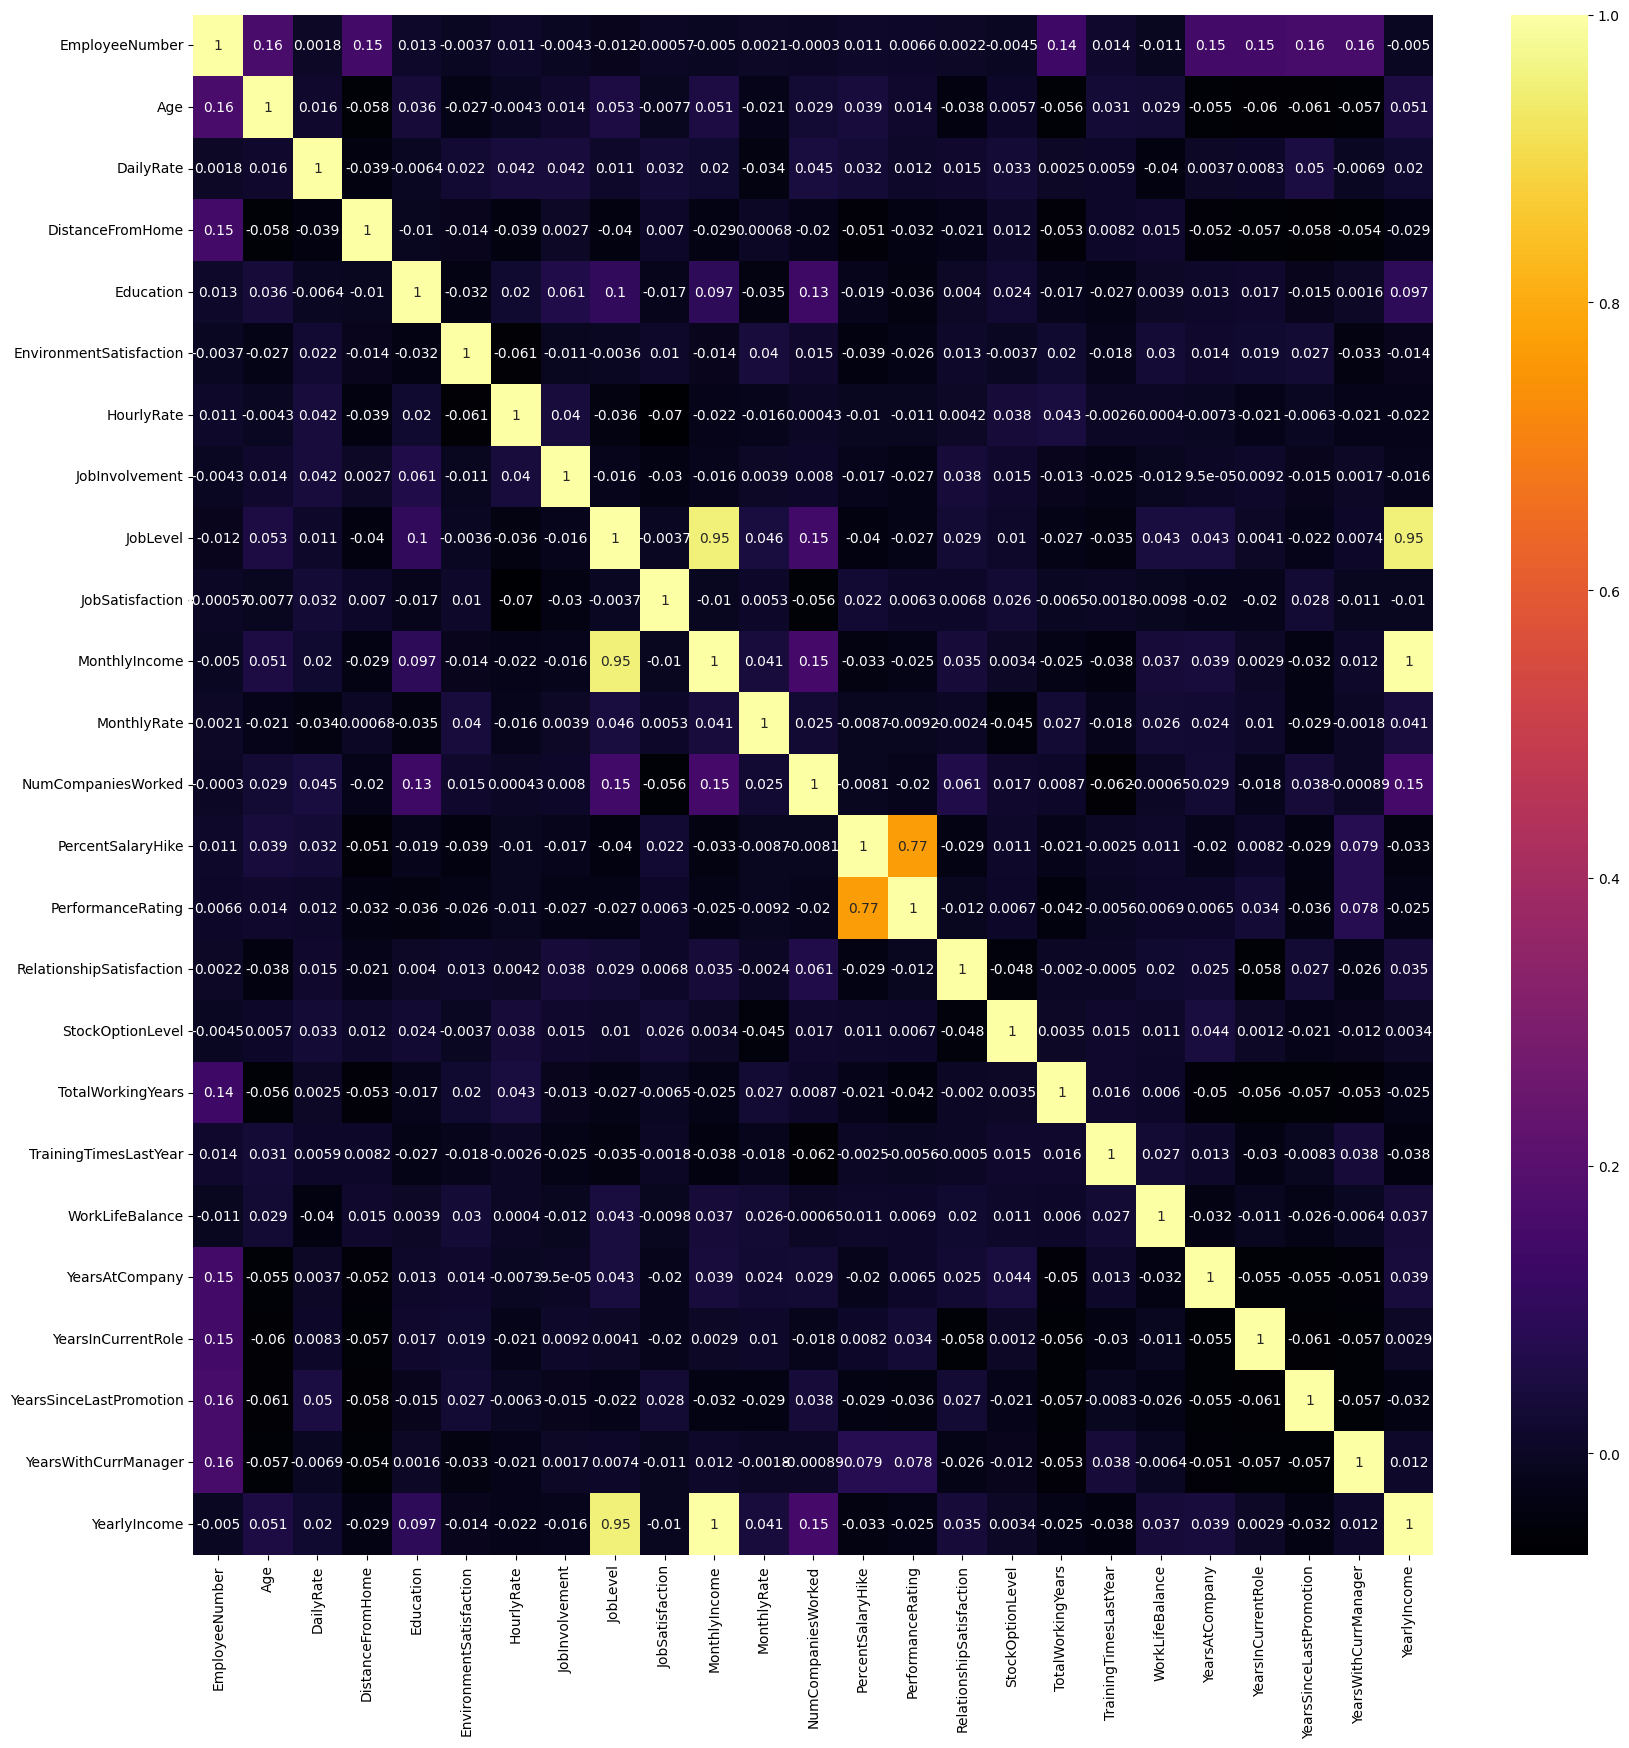

In [166]:
corr_df=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,annot=True,fmt='.2g',cmap='inferno')

Monthlycome and JobLevel is too correlated with the YearyIncome, so it needs to be removed.

In [167]:
# drop too correlated columns
df.drop(['MonthlyIncome','JobLevel'],axis = 1,inplace = True)

In [168]:
# generate descriptive statistics
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,...,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000
mean,4809.243143,429.123199,800.843794,34478.313343,2.906788,2.719665,66.036495,2.741516,2.722920,14266.381450,...,2.725709,0.787773,354.004649,2.803347,2.765923,312.854719,367.109484,399.000930,334.767550,77439.202232
std,2643.040205,1591.153416,405.655763,147682.315767,1.026460,1.092333,20.298352,0.711379,1.106692,7154.584275,...,1.079747,0.849147,1508.016854,1.302586,0.708878,1373.999529,1480.107024,1597.939659,1431.991884,56075.927510
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,2094.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1680.250000,31.000000,457.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,7910.250000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34764.000000
50%,5828.500000,36.000000,804.000000,8.000000,3.000000,3.000000,66.000000,3.000000,3.000000,14174.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,6903.750000,45.000000,1162.000000,17.000000,4.000000,4.000000,84.000000,3.000000,4.000000,20471.000000,...,4.000000,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,99693.000000
max,7979.000000,9890.000000,1499.000000,999590.000000,5.000000,4.000000,100.000000,4.000000,4.000000,26999.000000,...,4.000000,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


Incorrect values for age and years of work sections will be corrected below

array([[<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>],
       [<Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>,
        <Axes: title={'center': 'YearsAtComp

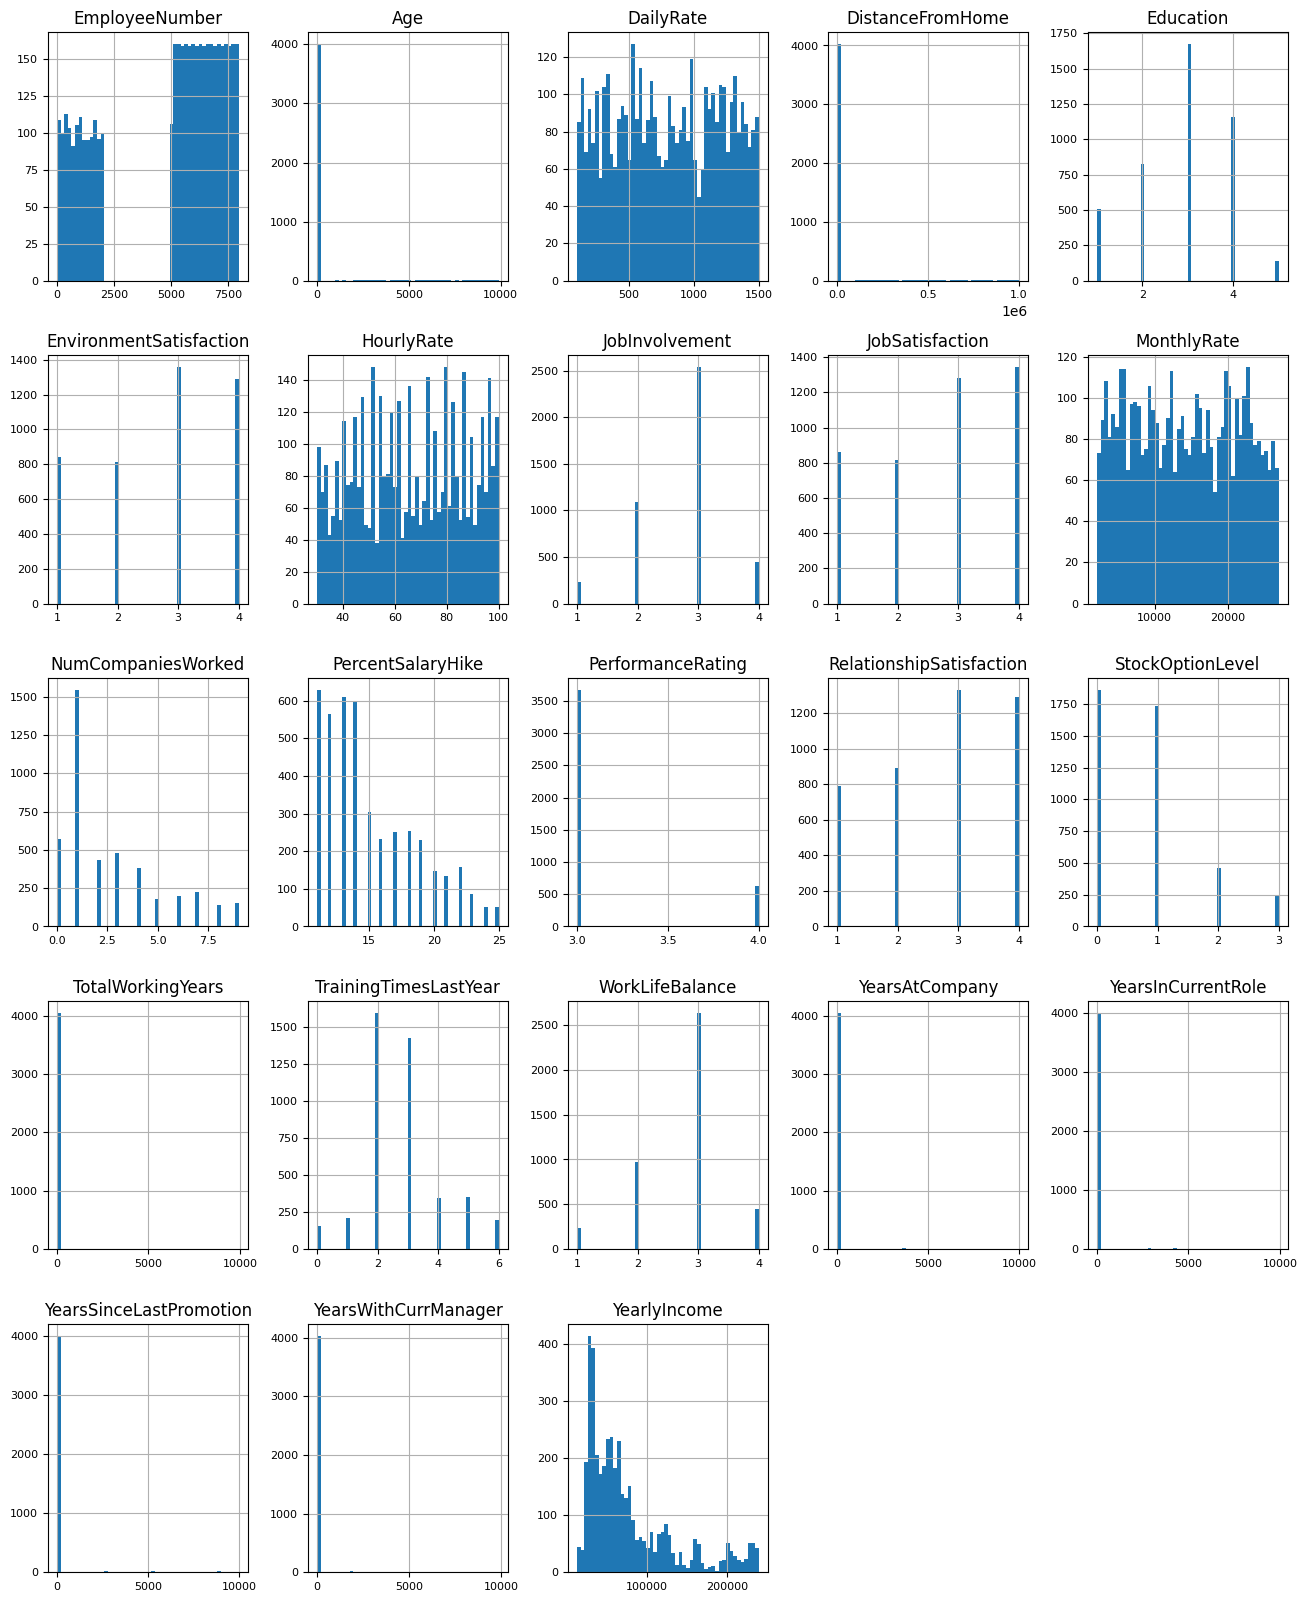

In [169]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Obseravtion: Age, DistanceFromHome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,YearsWithCurrManager have outliers

<Axes: xlabel='YearsSinceLastPromotion'>

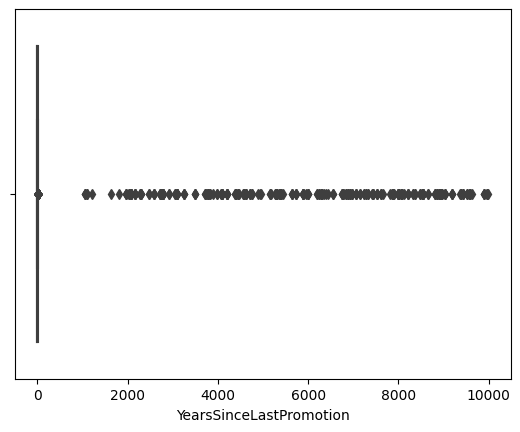

In [170]:
# checking the values for YearsSinceLastPromotion, more precisely
sns.boxplot(x=df["YearsSinceLastPromotion"])

Observation: outliers are begin around 1,000

<Axes: xlabel='YearsWithCurrManager'>

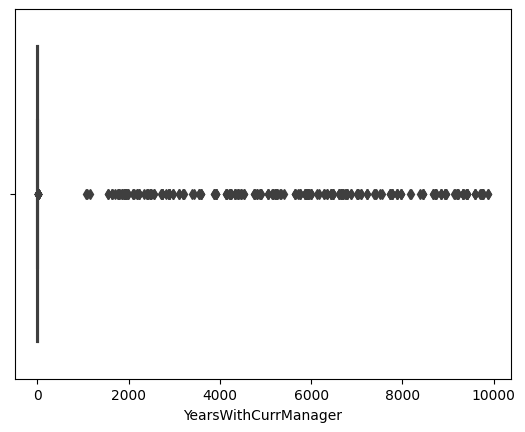

In [171]:
# checking the values for YearsWithCurrManager, more precisely
sns.boxplot(x=df["YearsWithCurrManager"])

Observation: outliers are begin around 1,000

<Axes: xlabel='DistanceFromHome'>

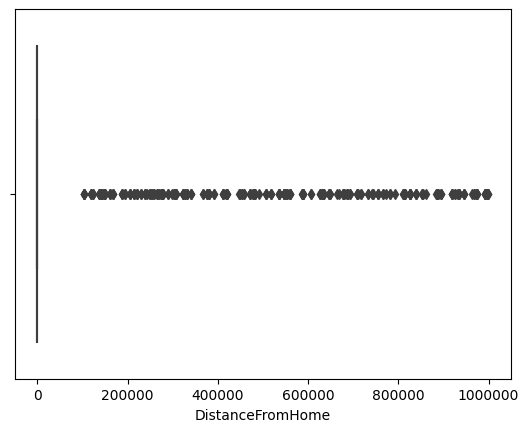

In [172]:
# checking the values for YearsWithCurrManager, more precisely
plt.ticklabel_format(style='plain')
sns.boxplot(x=df["DistanceFromHome"])

Observation: we assume that above 50 000 there are outliers



In [173]:
# disregarding outliers
df = df.loc[
    (df["Age"] < 90) # abstractly, we will note that you work until the age of 90
    & (df["TotalWorkingYears"] < 100)  # average working years is 40, we will add 10 years
    & (df["YearsAtCompany"] < 50) # abstractly, assume that someone worked in only one company
    & (df["YearsInCurrentRole"] < 50) # abstractly, we assume that someone only worked in one position
    & (df["YearsSinceLastPromotion"] < 50)
    & (df["YearsWithCurrManager"] < 50)
    & (df["DistanceFromHome"] < 50000)]

array([[<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>],
       [<Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>,
        <Axes: title={'center': 'YearsAtComp

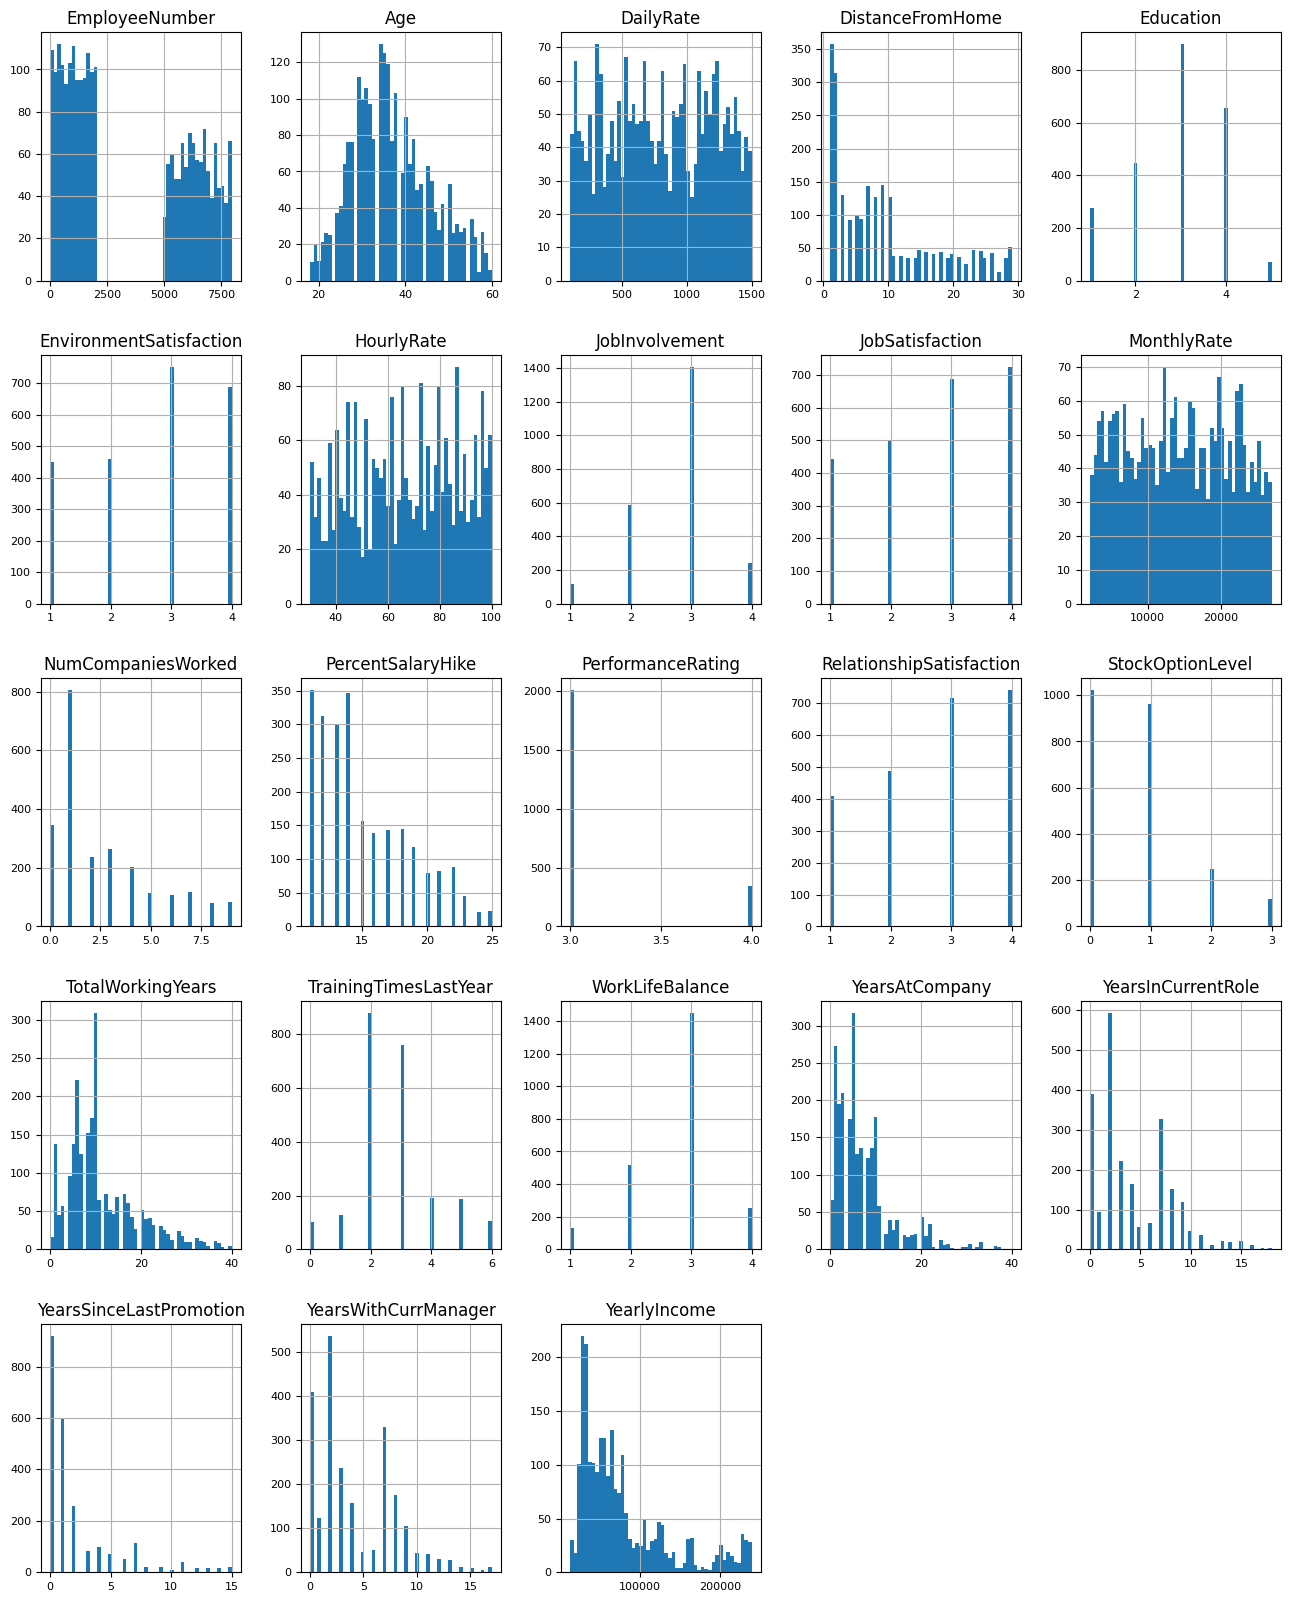

In [174]:
# generates histograms for each numerical column in the DataFrame `df`after disregarding outliers. The histograms are displayed in a grid layout with a figure size of (16, 20).
# The `bins` parameter specifies the number of bins to use for each histogram. The `xlabelsize` and `ylabelsize` parameters control the size of the x-axis and y-axis labels, respectively.

df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Outliers removed correctly

# Data Preprocessing

In [175]:
# ransforms the values in the "Attrition" column of the DataFrame df from categorical values ("No" and "Yes") to numerical values (0 and 1)
target_map = {"No" : 0, "Yes" : 1}

# for each value in the "Attrition" column, if the value is "No", it will be mapped to 0, and if it's "Yes", it will be mapped to 1.
df["Attrition"] = df["Attrition"].map(target_map)

In [176]:
df_dum = pd.get_dummies(df) # One-hot encoding is a technique used to convert categorical variables into a binary (0 or 1) format

In [177]:
df_dum.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,104,30.0,852.0,1.0,1.0,4.0,55.0,2.0,4.0,15998.0,...,0,0,0,0,0,0,1,0,0,1
1,1638,38.0,397.0,2.0,2.0,4.0,54.0,2.0,3.0,14199.0,...,1,0,0,0,0,0,1,0,0,1
2,164,26.0,841.0,6.0,3.0,3.0,46.0,2.0,2.0,23300.0,...,0,0,1,0,0,0,1,0,1,0
3,395,28.0,1117.0,8.0,2.0,4.0,66.0,3.0,4.0,4488.0,...,0,0,1,0,0,0,0,1,1,0
4,53,35.0,464.0,4.0,2.0,3.0,75.0,3.0,4.0,10910.0,...,0,0,0,0,0,1,0,0,1,0


We will further reduce the number of columns through feature importance

# Feature Scaling

In [178]:
# prepare variable
y = df_dum['Attrition'] # the target variable
X = df_dum.drop("Attrition",axis = 1)  # the features excluding the target variable and unnecessary EmployeeNumber

In [179]:
# split data into train and test with an 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

## Evaluation metrics

This code defines a function calculate_metrics that computes and prints various classification metrics based on the true labels y_test and the predicted labels y_pred. Here's an explanation of the metrics and their meanings:

**Accuracy:** Accuracy is the proportion of correctly predicted instances out of all instances. It provides a general view of the model's overall correctness.

**Precision:** Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It focuses on minimizing false positives.

**Recall:** Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. It focuses on minimizing false negatives.

**F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's accuracy, considering both false positives and false negatives.

In [180]:
def calculate_metrics(y_test, y_pred):
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_score_test = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy_test:0.4f}")
    print(f"Precision: {precision_test:0.4f}")
    print(f"Recall: {recall_test:0.4f}")
    print(f"F1-score: {f1_score_test:0.4f}")

## DecisionTreeClassifier
* classification model based on a decision tree. A decision tree is a structure consisting of nodes that represent splits in the data based on feature values.
*  During the learning process, the model constructs the tree by partitioning data using the best features that maximize the separation between classes.


In [181]:
dt = DecisionTreeClassifier(
    max_depth=5,            # Maximum depth of the tree
    min_samples_split=5,    # Minimum number of samples required to split a node
    min_samples_leaf=2,     # Minimum number of samples required in a leaf node
    max_features=None,      # Maximum number of features to consider when splitting a node
    random_state=42         # Random seed for reproducibility
)

dt.fit(X_train, y_train)

y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

In [182]:
calculate_metrics(y_pred_train, y_train) # for train prediction

Accuracy: 0.8160
Precision: 0.8347
Recall: 0.7233
F1-score: 0.7750


In [183]:
calculate_metrics(y_pred_test, y_test) # for test prediction

Accuracy: 0.7197
Precision: 0.7053
Recall: 0.6381
F1-score: 0.6700


Overall, we see that the decision tree model performs decently in terms of these metrics. However, it is always worth considering whether there are ways to further optimize (change of hyperparameters) and improve the model.

In [184]:
# Feature importances

importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt.feature_importances_})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

                              Feature  Importance
0                      EmployeeNumber    0.712499
22                       YearlyIncome    0.045428
6                          HourlyRate    0.035056
49                        OverTime_No    0.033558
3                    DistanceFromHome    0.024579
48               MaritalStatus_Single    0.019258
2                           DailyRate    0.018625
44            JobRole_Sales Executive    0.013366
15                  TotalWorkingYears    0.013185
5             EnvironmentSatisfaction    0.010456
41     JobRole_Manufacturing Director    0.009714
37  JobRole_Healthcare Representative    0.009282
18                     YearsAtCompany    0.008950
14                   StockOptionLevel    0.008619
17                    WorkLifeBalance    0.008437
27  Department_Research & Development    0.007225
21               YearsWithCurrManager    0.006833
1                                 Age    0.006118
9                         MonthlyRate    0.005303


* columns with a low importance index below 0.02 will be omitted

In [185]:
def select_features_by_importance(importance_df, threshold):
    selected_features = importance_df[importance_df['Importance'] >= threshold]['Feature'].tolist()
    return selected_features

threshold = 0.02
selected_features = select_features_by_importance(importances_df, threshold)

print("Selected features:")
print(selected_features)

Selected features:
['EmployeeNumber', 'YearlyIncome', 'HourlyRate', 'OverTime_No', 'DistanceFromHome']


In [186]:
X_train = X_train[selected_features]

In [187]:
X_test = X_test[selected_features]

In [188]:
X_test.shape

(471, 5)

In [189]:
# standardize features by removing the mean and scaling to unit variance
scaler = MinMaxScaler()
scaler.fit(X_train)
# scale test and train data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression
* the input features are linearly combined with weights, and then the logistic function transforms the result into a probability score. If the probability score is above a certain threshold (usually 0.5), the instance is predicted to belong to the positive class; otherwise, it's predicted to belong to the negative class.


In [190]:
# solver to po prostu algorytm do szukania minimum funkcji (np. gradient descent)
model = LogisticRegression(random_state = SEED, solver = "liblinear")

# Finding the best model hyperparameters
parameters_grid_to_search = {
    "C": list(np.arange(0.75, 1.25, 0.5)), # regularization strength parameter
    "penalty" : ["l1", "l2"] # type of regularization
     }

searcher = GridSearchCV(estimator = model, param_grid = parameters_grid_to_search, cv = 5)

searcher.fit(X_train_scaled, y_train)

print(f"Best CV params {searcher.best_params_}")

Best CV params {'C': 0.75, 'penalty': 'l1'}


In [191]:
model = LogisticRegression(random_state = SEED, penalty = "l1", C = 0.75, solver = "liblinear") #L1(lasso)
# model teaching
model.fit(X_train_scaled, y_train)

tsh = 0.5 # threshold line

# prediction
y_scores = model.predict_proba(X_test_scaled)

y_pred_lr = np.where(y_scores[:, 1] > tsh, 1, 0)

In [192]:
calculate_metrics(y_test, y_pred_lr)

Accuracy: 0.7028
Precision: 0.6316
Recall: 0.6316
F1-score: 0.6316


**The values in the confusion matrix represent:**

* The top-left value is the number of True Negatives (TN).
* The top-right value is the number of False Positives (FP).
* The bottom-left value is the number of False Negatives (FN).
* The bottom-right value is the number of True Positives (TP).

[]

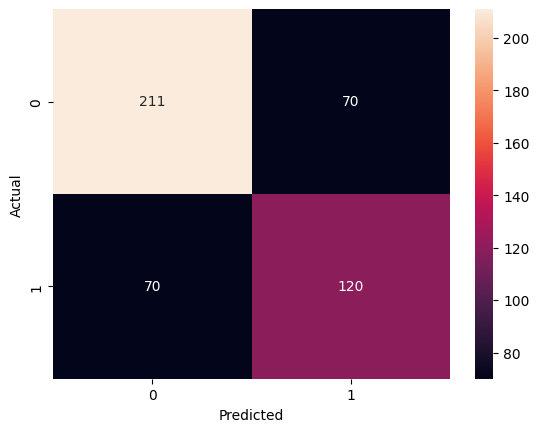

In [193]:
cm_plot = sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot = True, fmt='g')
cm_plot.set(xlabel = "Predicted", ylabel = "Actual")
cm_plot.plot()

## Support Vectors Machines (SVM)
*  works by finding the optimal hyperplane that best separates the data points of different classes while maximizing the margin between the classes.

In [194]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 5, 8],           # Regularization parameter
    'kernel': ['rbf'],  # Kernel type
    'degree': [2, 3, 4, 5],      # Degree for polynomial kernel
}

# Create the SVM model
model = SVC(random_state=SEED)

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator (model)
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_SVM = best_model.predict(X_test_scaled)
y_train_SVM = best_model.predict(X_train_scaled)

Best Parameters: {'C': 8, 'degree': 2, 'kernel': 'rbf'}


In [195]:
calculate_metrics(y_train, y_train_SVM)

Accuracy: 0.7947
Precision: 0.7060
Recall: 0.7871
F1-score: 0.7444


In [196]:
calculate_metrics(y_test, y_pred_SVM)

Accuracy: 0.7176
Precision: 0.6351
Recall: 0.7053
F1-score: 0.6683


## KNeighbors Classifier
* makes predictions based on the proximity of data points in the feature space.

In [197]:
# Create KNN model
knn = KNeighborsClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 9],       # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_
print("Best Parameters:", best_params)


# Make predictions using the best model
y_pred_KN = best_knn_model.predict(X_test_scaled)
y_scores_KN = best_knn_model.predict_proba(X_test_scaled)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [198]:
calculate_metrics(y_test, y_pred_KN)

Accuracy: 0.7197
Precision: 0.6422
Recall: 0.6895
F1-score: 0.6650


Roc Curve
* curve and the Area Under the Curve (AUC) are used to evaluate the performance of binary classification models. They help in understanding a model's ability to discriminate between two classes at different probability thresholds

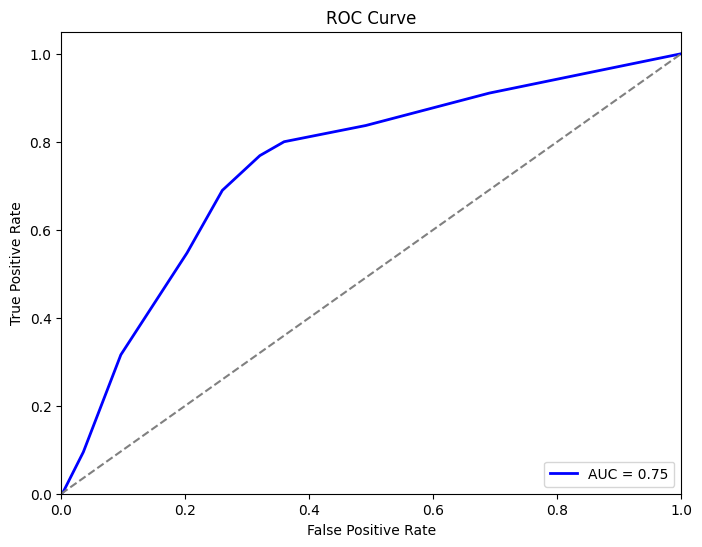

In [199]:
# Calculate ROC curve and AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores_KN[:, 1])
roc_auc = roc_auc_score(y_test, y_scores_KN[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

the result of the curve roc 0.75 shows that there is a 75% probability that we will correctly classify that the employee will stay

## Random Forest Classifier
*  It's an extension of the decision tree algorithm that aims to improve the accuracy and robustness of individual decision trees by combining multiple trees into a "forest."

In [200]:
clf = RandomForestClassifier()

param_grid = {
    "n_estimators": [50,100,200],
    "max_depth": [None,4, 5,],
    "min_samples_split": [10,15,20,30],
    "min_samples_leaf": [4,6,8]
}

cv = GridSearchCV(clf, param_grid, scoring = "f1", cv = 5, n_jobs = -1)
cv.fit(X_train_scaled, y_train)

best_cv_parameters = cv.best_params_

In [201]:
best_cv_parameters

{'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 30,
 'n_estimators': 50}

In [202]:
clf = RandomForestClassifier(**best_cv_parameters)

# model teaching
clf.fit(X_train_scaled, y_train)

# prediction
y_pred_RFC = clf.predict(X_test_scaled)
y_train_RFC = clf.predict(X_train_scaled)

In [203]:
calculate_metrics(y_train, y_train_RFC)

Accuracy: 0.7963
Precision: 0.7051
Recall: 0.7969
F1-score: 0.7482


In [204]:
calculate_metrics(y_test, y_pred_RFC)

Accuracy: 0.7155
Precision: 0.6321
Recall: 0.7053
F1-score: 0.6667


### Overall, the results are within acceptable limits and indicate that the model has some classification capability. For better results, it might be necessary to recheck the data for outliers, search a larger range of model hyperparameters, use more advanced models.